In [477]:
#import libraries
#The "TARGET" column is the variable to predict. It equals 0 for unsatisfied customers and 1 for satisfied customers.

#Models

from sklearn import decomposition
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample


#Transformation
import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE

#Graphics
import matplotlib.pyplot as plt
%matplotlib inline

In [478]:
%%time
#Loading the train Data set

df_train = pd.read_csv("DataSet/train.csv")
df_test = pd.read_csv("DataSet/Test.csv")
df_Y_test = pd.read_csv("DataSet/sample_submission.csv")

Wall time: 6.08 s


In [479]:
#76020 variables and 371 observations. 
df_train.shape

(76020, 371)

In [480]:
#Check types for all collumns - Only Int and Float
dataTypeSeries = set(df_train.dtypes)
dataTypeSeries


{dtype('int64'), dtype('float64')}

# Resempling

In [481]:
from sklearn.utils import resample
# Create oversampled training data set for minority class
#
#X_oversampled = resample(df_train[df_train['TARGET']==1],
#                   replace=True,
#                   n_samples=X_treino[df_train['TARGET']==0].shape[0],
#                   random_state=123)
#
# Append the oversampled minority class to training data and related labels
#
X_treino_up = resample(df_train, 
                        replace=True, 
                        n_samples=df_train['TARGET'].value_counts()[0],# to match majority class sample count
                        random_state=1) 


In [482]:
X_treino_balanced=pd.concat([df_train,X_treino_up[X_treino_up["TARGET"]==1]])


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


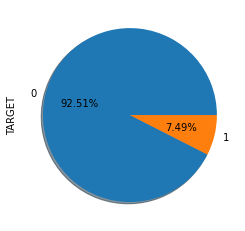

In [483]:
X_treino_balanced['TARGET'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True)
X_treino_balanced.head()

In [484]:
#Split in X and Y
Y_treino = X_treino_balanced["TARGET"]
X_treino = X_treino_balanced
X_treino.drop("TARGET", axis=1, inplace=True)
X_treino.index=X_treino["ID"]
X_treino.drop("ID", axis=1, inplace=True)
print(X_treino.shape, Y_treino.shape)

(78921, 369) (78921,)


In [485]:
X_treino.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [486]:
#The test Dataset in this project was given with already splited in X and Y.
#Here we will drop the column ID

#Mudanças para X_Test
X_test = df_test
X_test.index = df_test["ID"]
X_test.drop("ID", axis=1, inplace=True)

#Mudanças para Y_test
Y_test=df_Y_test["TARGET"]



In [487]:
print(X_treino.shape, Y_treino.shape,X_test.shape, Y_test.shape)

(78921, 369) (78921,) (75818, 369) (75818,)


# Normalização dos dados

In [488]:
%%time

#Normalização de treino
scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_df_treino_scaled = pd.DataFrame(X_treino_scaled, index=X_treino.index)
#Normalização de test
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
X_df_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index)

Wall time: 2.32 s


# Balanceamento

In [489]:
scaler_x_train, scaler_x_test, scaler_y_train, scaler_y_test = train_test_split(X_df_treino_scaled, Y_treino, test_size=0.3)

<AxesSubplot:title={'center':'Count_target'}>

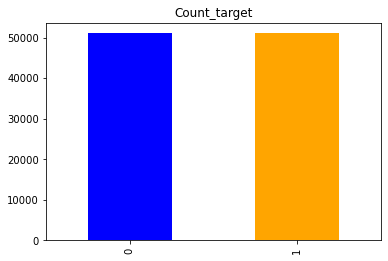

In [490]:
smote = SMOTE()
x_over, y_over = smote.fit_resample(scaler_x_train,scaler_y_train)
y_over.value_counts().plot(kind='bar',title='Count_target',color=['blue','orange'])

In [393]:
print(x_over.shape,y_over.shape,X_df_test_scaled.shape,Y_test.shape)

(102254, 369) (102254,) (75818, 369) (75818,)


# Redução da dimensionalidade

In [336]:
%%time
#Utilizando o PCA para reduzir a dimensionalidade

pca = decomposition.PCA()
pca.fit(X_df_treino_scaled)

Wall time: 6.42 s


PCA()

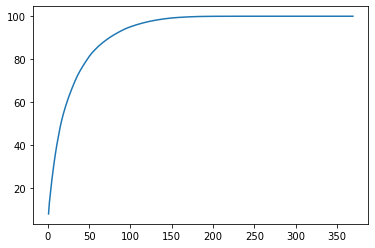

In [337]:
y = np.cumsum(pca.explained_variance_ratio_ * 100)
x = np.arange(1,len(pca.explained_variance_)+1)
plt.plot(x,y)
plt.show()

In [338]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.99) + 1
d

146

In [339]:
%%time
pca = decomposition.PCA(n_components=d)
pca.fit(X_df_treino_scaled)

Wall time: 8.07 s


PCA(n_components=146)

In [340]:
%%time
X_treino_pca = pca.fit_transform(X_df_treino_scaled)
X_test_pca = pca.fit_transform(X_df_test_scaled)

Wall time: 15 s


In [341]:
# Shape
print(X_treino_pca.shape)
print(X_test_pca.shape)

(78921, 146)
(75818, 146)


In [342]:
X_treino_pca=pd.DataFrame(X_treino_pca, index=X_treino.index)
X_test_pca=pd.DataFrame(X_test_pca,  index=X_test.index)

In [344]:
X_test_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,136,137,138,139,140,141,142,143,144,145
ID,,,,,,,,,,,,,,,,,,,,,
1,-2.649203,-1.556403,-0.201885,0.236791,0.284824,-1.322057,0.158046,-0.113892,-0.032896,-0.186699,...,0.010603,0.007035,-0.014441,0.003272,-0.004058,-0.019205,0.000626,-0.005213,0.015947,-0.010502
3,-0.998435,7.941052,-4.068248,4.983067,3.240302,-0.172782,0.133655,0.061436,-0.533466,-0.174073,...,0.181477,-0.135803,0.012762,-0.218159,-0.054886,-0.023913,-0.000786,0.007254,0.040262,0.159572
4,-1.957120,-0.904210,0.016232,-0.103778,0.101910,0.196241,0.006059,-0.110835,0.041590,0.071602,...,0.192327,-0.180942,0.172628,0.066014,-0.078432,-0.054655,-0.010613,0.012045,0.014646,0.060435
8,4.445458,-1.339784,0.092006,0.006541,-0.445215,2.879440,-0.405226,0.137211,0.160645,0.305493,...,0.316559,-0.168226,0.043566,0.282637,-0.124567,-0.179312,0.161122,-0.037961,0.180188,0.003903
10,1.987699,8.514646,3.679860,-9.650119,-7.341323,-1.962481,-0.223906,0.837836,-0.484031,0.023214,...,-0.025471,-0.211531,0.123783,-0.062741,0.020013,0.027578,0.192538,-0.022933,-0.107940,-0.195214


# Criação dos Modelos

In [ ]:
#X_Treino = x_over
#Y_Treino = y_over
#X_Test = scaler_x_test
#Y_Test = scaler_y_test
#Previsao X_Teste = X_df_test_scaled
#Previsao Y_Teste = Y_test

In [394]:
%%time
#Randon Forest

randomForest = RandomForestClassifier(n_estimators = 200)
randomForest = randomForest.fit(x_over, y_over)
score = randomForest.score(x_over , y_over)
print(score)

0.9879417920081366
Wall time: 1min 52s


In [399]:
%%time
#Previsões com o dados de treino balanceado
y_predict = randomForest.predict(scaler_x_test)
score = randomForest.score(scaler_y_test , y_predict)
print(score)

Wall time: 2.21 s


<AxesSubplot:>

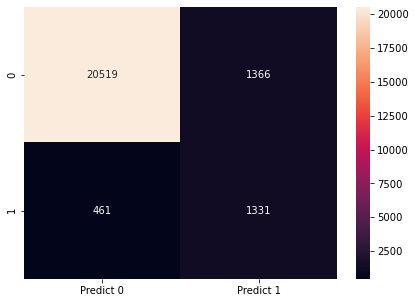

In [400]:

#confusion Matrix com o dados de treino balanceado
from sklearn import metrics
import seaborn as sns
cm=metrics.confusion_matrix(scaler_y_test,y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [470]:
%%time
#Previsões com o dados de treino real
y_predict3 = randomForest.predict(X_df_test_scaled)
pscore = metrics.accuracy_score(Y_test, y_predict3)
print(pscore)

0.44862697512464056
Wall time: 3.23 s


<AxesSubplot:>

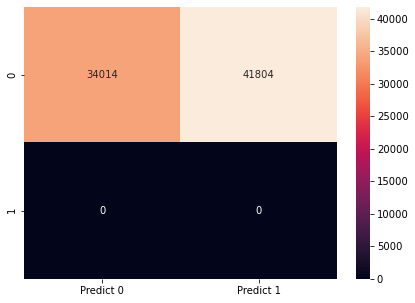

In [426]:
#confusion Matrix com o dados de treino real
from sklearn import metrics
import seaborn as sns
cm=metrics.confusion_matrix(Y_test,y_predict3, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [462]:
df_modelo_rf=pd.DataFrame(y_predict3, columns=["TARGET"])
df_modelo_rf["ID"]=X_df_test_scaled.index
df_modelo_rf.to_csv(r'df_modelo_rf.csv', index = False)
print("Modelo salvo!")

Modelo salvo!


In [407]:
## XGBOOST

In [ ]:
#X_Treino = x_over
#Y_Treino = y_over
#X_Test = scaler_x_test
#Y_Test = scaler_y_test
#Previsao X_Teste = X_df_test_scaled
#Previsao Y_Teste = Y_test